In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
import os
import path
import scipy

In [2]:
os.getcwd()

'C:\\Users\\Lenovo s\\Downloads\\ACADEMICS\\Coding Practice\\Python'

In [3]:
root_dir = "/Users/Lenovo s/Downloads/ACADEMICS/Coding Practice/Python"

In [4]:
os.path.exists(root_dir)

True

In [5]:
train_dir = "/Users/Lenovo s/Downloads/ACADEMICS/Coding Practice/Python/Dataset/train"
test_dir = "/Users/Lenovo s/Downloads/ACADEMICS/Coding Practice/Python/Dataset/test"
val_dir = "/Users/Lenovo s/Downloads/ACADEMICS/Coding Practice/Python/Dataset/val"

In [6]:
os.path.exists(val_dir)

True

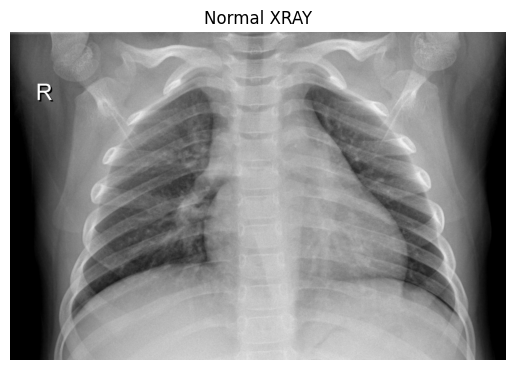

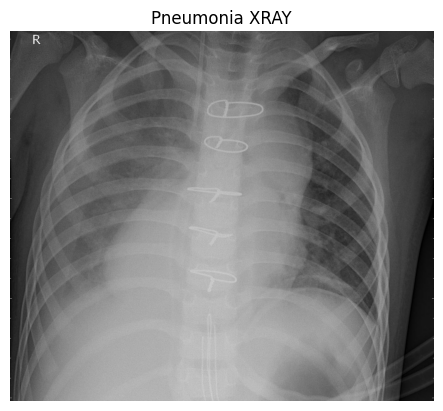

In [7]:
img = load_img(train_dir + "/NORMAL/IM-0127-0001.jpeg")
plt.imshow(img)
plt.axis("off")
plt.title("Normal XRAY")
plt.show()

img = load_img(train_dir + "/PNEUMONIA/person2_bacteria_4.jpeg")
plt.imshow(img)
plt.axis("off")
plt.title("Pneumonia XRAY")
plt.show()

In [8]:
Classes = ["NORMAL", "PNEUMONIA"]

In [9]:
from glob import glob
className = glob(train_dir+ "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

NumberofClass: 2


In [26]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255,
                  #shear_range=0.3,
                  horizontal_flip=True
                  #zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
    class_mode='binary'
                )

val_generator = val_datagen.flow_from_directory(
                val_dir,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode='binary'
                )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [27]:
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 23521409 (89.73 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [29]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [30]:
batch_size = 32

In [32]:

epochs = 8
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
     callbacks=[checkpoint , early_stop],
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

Epoch 1/8
163/163 [==============================] - 1407s 8s/step - loss: 0.1160 - accuracy: 0.9544 - precision: 0.9654 - recall: 0.9734
Epoch 2/8
163/163 [==============================] - 1208s 7s/step - loss: 0.0837 - accuracy: 0.9716 - precision: 0.9799 - recall: 0.9819
Epoch 3/8
163/163 [==============================] - 1196s 7s/step - loss: 0.0624 - accuracy: 0.9776 - precision: 0.9840 - recall: 0.9858
Epoch 4/8
163/163 [==============================] - 1136s 7s/step - loss: 0.0486 - accuracy: 0.9820 - precision: 0.9889 - recall: 0.9868
Epoch 5/8
163/163 [==============================] - 1155s 7s/step - loss: 0.0466 - accuracy: 0.9827 - precision: 0.9891 - recall: 0.9876
Epoch 6/8
163/163 [==============================] - 1294s 8s/step - loss: 0.0396 - accuracy: 0.9860 - precision: 0.9905 - recall: 0.9907
Epoch 7/8
163/163 [==============================] - 1377s 8s/step - loss: 0.0548 - accuracy: 0.9810 - precision: 0.9881 - recall: 0.9863
Epoch 8/8
163/163 [===============

In [36]:
model.save("model2.h5")

In [44]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall'])


KeyError: 'val_loss'

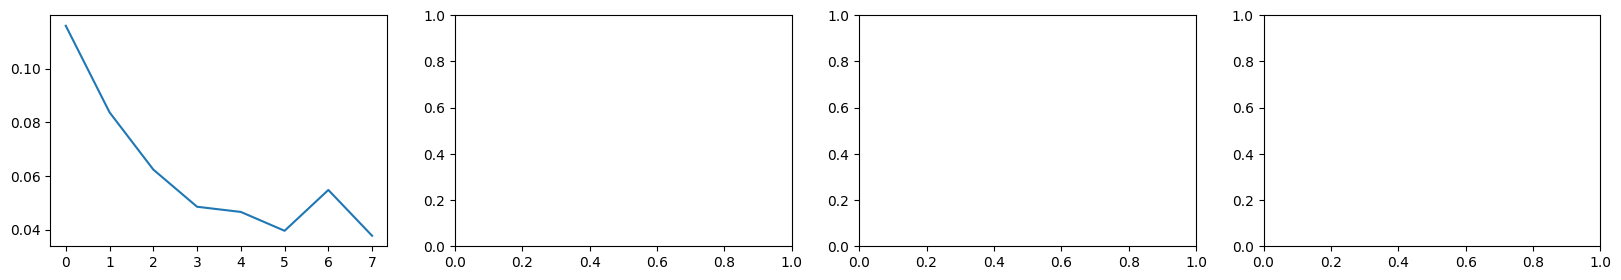

In [43]:
precision = history.history['precision']  
recall = history.history['recall']


fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()


for i, met in enumerate(['loss', 'accuracy', 'precision', 'recall']):
    ax[i].plot(history.history[met])  
    ax[i].plot(history.history['val_' + met])  
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])


In [42]:
model.metrics_names

['loss', 'accuracy', 'precision', 'recall']

In [35]:
#model.load_weights("best_weights.h5")
model.save("model.h5")

C:\Users\Lenovo s\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
